In [2]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-26-15-30-10', '2024-04-25-19-54-41', '2024-04-25-21-23-45', '2024-04-26-09-48-53','2024-04-26-11-22-32', '2024-05-01-11-32-26']
filters = {"tags": {"$in": tags}, "state": "finished", "config.use_visit_count": True}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [4]:
# crete a dataframe from runs and summary metrics
# async def add_max_to_summary(run):
#     try:
#         history: pd.DataFrame = run.history()
#         # get the row with the highest Self_Play/Mean_Reward
#         metric = "Self_Play/Mean_Reward"
#         best_row = history.loc[history[metric].idxmax()]
#         run.summary[f'max_{metric}'] = best_row[metric]
#         run.summary[f'max_{metric}_step'] = best_row['_step']
#         run.summary.update()
#     except:
#         pass



# async def get_history(run):
#     return await run.history()

# tasks = []
# for run in runs:
#     if run.state != "finished":
#         continue
#     tasks.append(add_max_to_summary(run))

# await asyncio.gather(*tasks)


data = []
for run in tqdm(runs):
    history: pd.DataFrame = run.history()
    for i, row in history.iterrows():
        # add a row to the data with run.config and the history row merged
        data.append({**run.config, **row})

df = pd.DataFrame(data)

df


100%|██████████| 120/120 [01:04<00:00,  1.87it/s]


,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Evaluation/Mean_Entropy,Evaluation/Mean_Returns,Training/Regularization_loss,Training/Value_and_Policy_loss,episodes,Self_Play/Mean_Return,Self_Play/Timesteps,Evaluation/Entropies,Evaluation/Mean_Discounted_Returns,Self_Play/Total_Mean_Discounted_Return
0,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,0.997119,-100.0,144.642975,6.531431,6,-91.166664,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-100.0,-91.166664
1,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,140.740936,6.502045,12,-99.500000,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",None,NaN,-95.333332
2,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,137.312683,6.504810,18,-99.833336,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",None,NaN,-96.833333
3,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,134.307190,6.468630,24,-94.500000,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",None,NaN,-96.250000
4,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,131.731934,6.499599,30,-100.000000,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",None,NaN,-97.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,0.121100,-15.0,172.254471,55.436257,156,-15.833333,"{'values': [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-15.0,-62.782051
3596,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,172.491150,44.794356,162,-16.166666,"{'packedBins': {'count': 64, 'min': 15, 'size'...",None,NaN,-61.055555
3597,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,172.152832,39.958407,168,-15.666667,"{'_type': 'histogram', 'values': [4, 0, 0, 0, ...",None,NaN,-59.434524
3598,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,NaN,NaN,171.569672,33.309776,174,-15.500000,"{'packedBins': {'min': 15, 'size': 0.03125, 'c...",None,NaN,-57.919540


In [5]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Evaluation/Timesteps',
       'Training/Learning_Rate', 'Self_Play/Min_Timesteps',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Timesteps', '_step',
       'Self_Play/Min_Return', 'Training/Value_Simularities', 

In [6]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [7]:
episode_max = df['episodes'].max()
# if episodes is Nan, set it to episode_max
df['episodes'] = df['episodes'].fillna(episode_max)

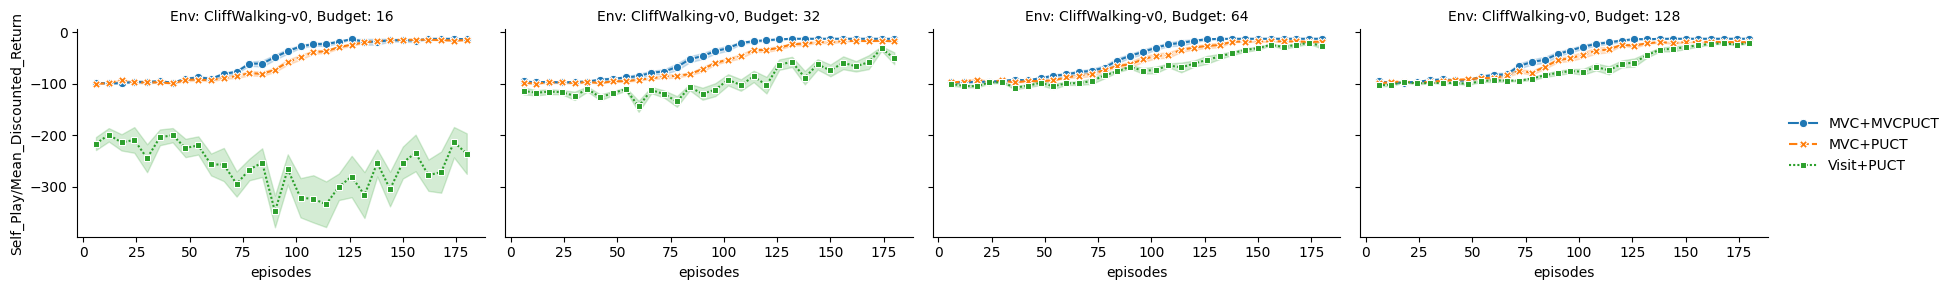

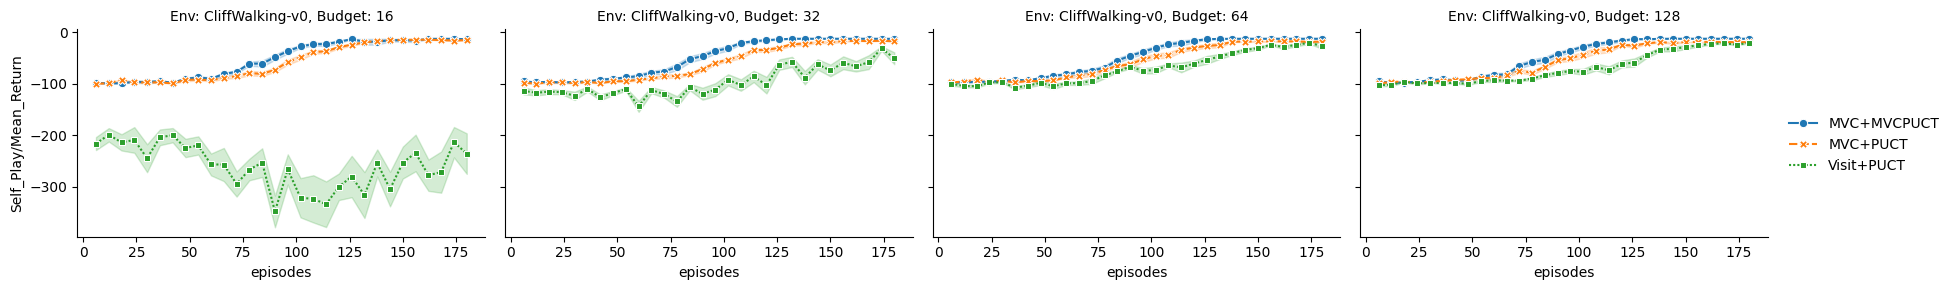

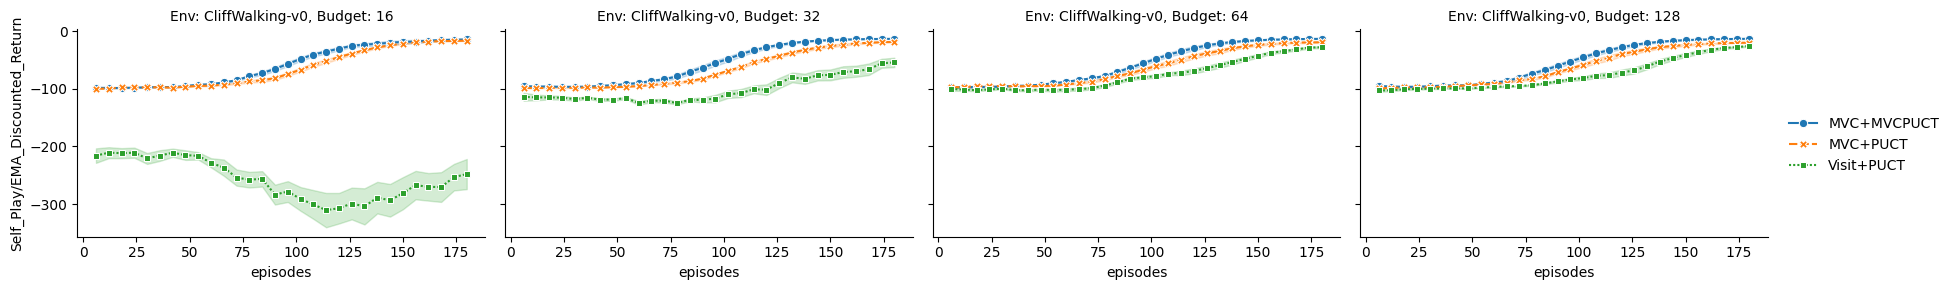

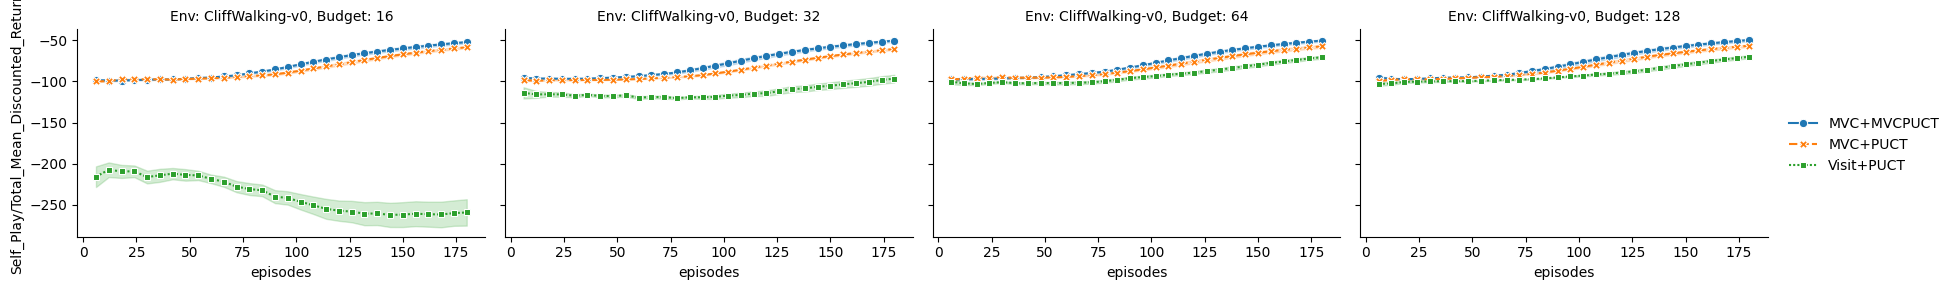

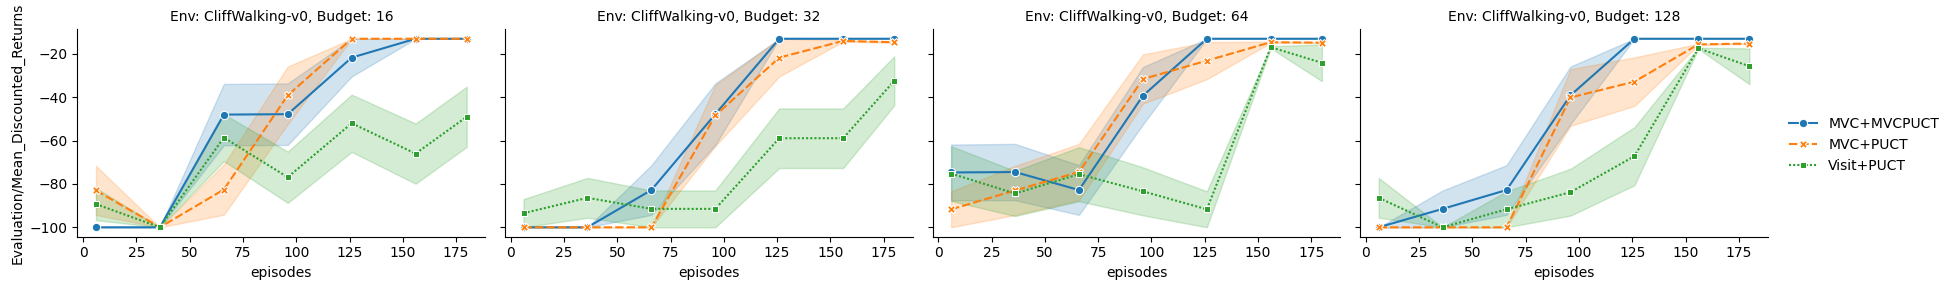

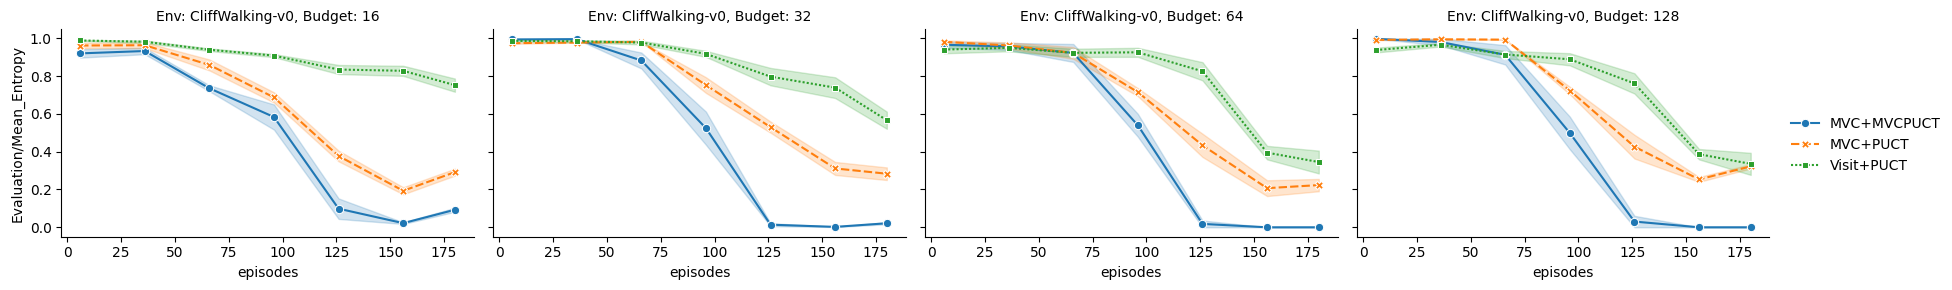

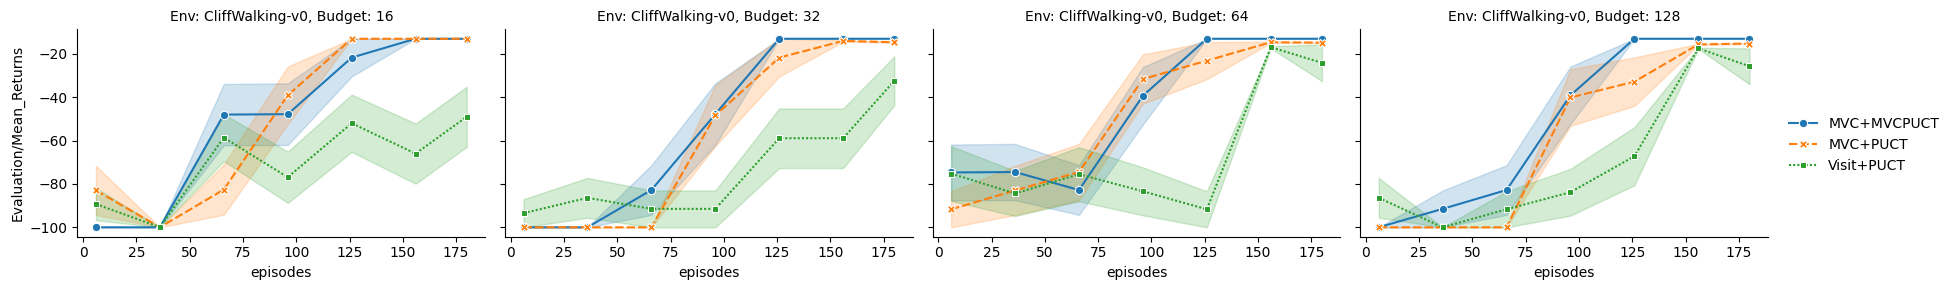

In [8]:





df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
policy_combination_mapping = {
    'mvc+PolicyPUCT': 'MVC+MVCPUCT',
    'mvc+PUCT': 'MVC+PUCT',
    'visit+PUCT': 'Visit+PUCT'
}

# Rename the policy combinations in the DataFrame
df['policy_combination'] = df['policy_combination'].map(policy_combination_mapping)
metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]
x_metric = "episodes"

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed


    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("Env: {row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.show()

In [9]:
max_episode_length = df["max_episode_length"].max()
max_episode_length

100

In [10]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Evaluation/Timesteps',
       'Training/Learning_Rate', 'Self_Play/Min_Timesteps',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Timesteps', '_step',
       'Self_Play/Min_Return', 'Training/Value_Simularities', 

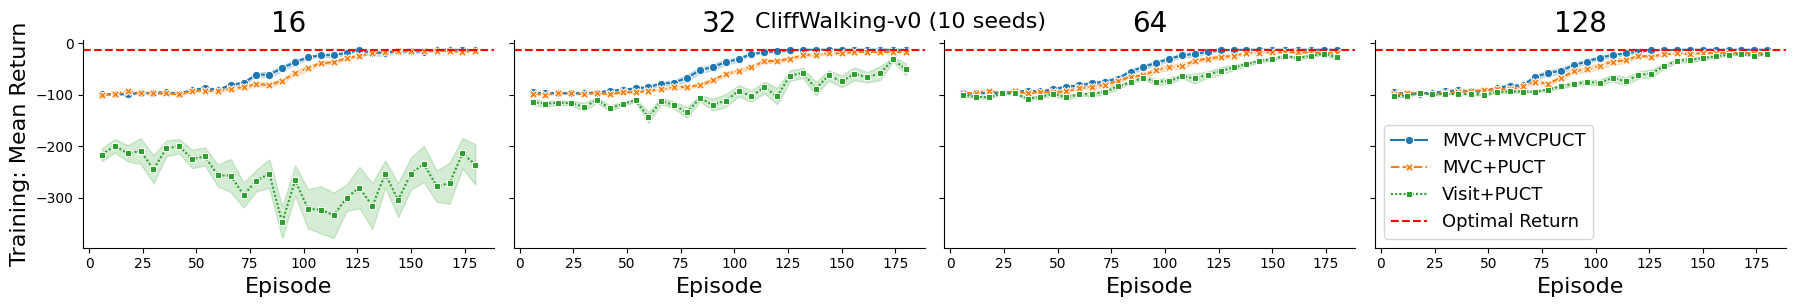

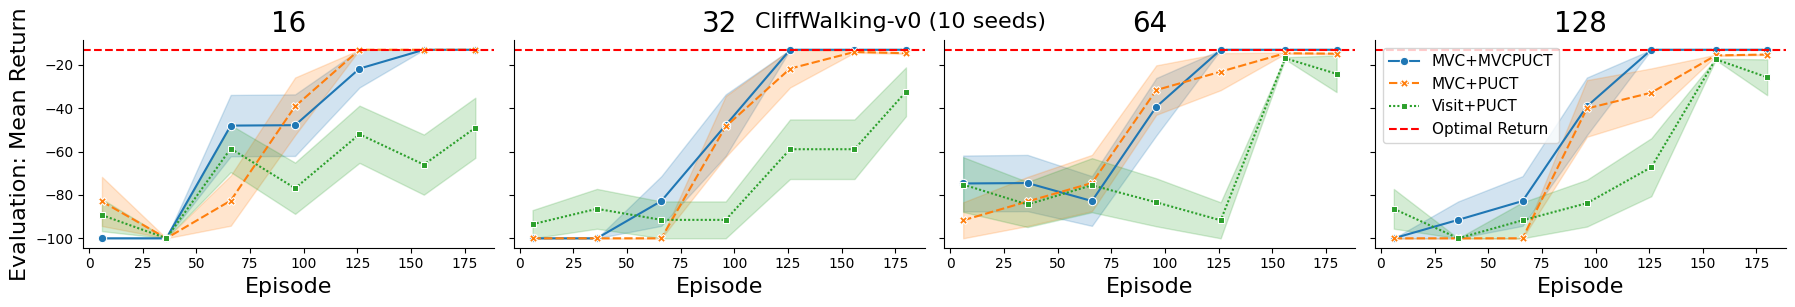

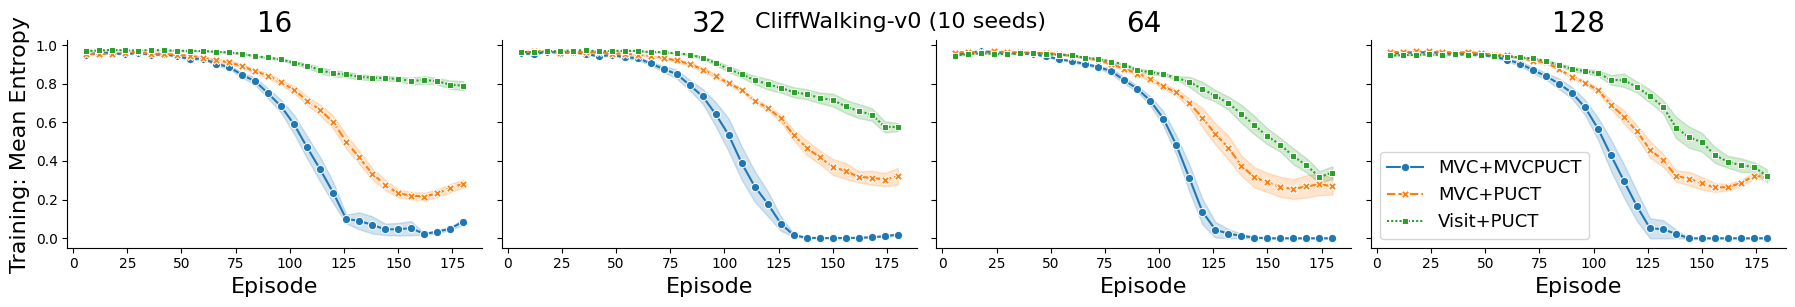

In [11]:
from matplotlib.lines import Line2D


env_description = "CliffWalking-v0"

env_runs = df[df["env_description"] == env_description]
optimum_value = env_runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns", "Self_Play/Mean_Entropy"]

metric_display_names = {
    "Self_Play/Mean_Discounted_Return": "Training: Mean Return",
    "Evaluation/Mean_Discounted_Returns": "Evaluation: Mean Return",
    "Self_Play/Mean_Entropy": "Training: Mean Entropy",
}

estimator = "mean"
nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    # only include budget 16 and 128

    g = sns.FacetGrid(data=df
                      , row="env_description", col="planning_budget", sharex="col", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot
    if metric != "Self_Play/Mean_Entropy":

        for ax in g.axes.flat:
            ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    g.set_titles("{col_name}", size=20)
    # add title
    g.fig.suptitle(f"{env_description} ({nseeds} seeds)", fontsize=16)

    # increase the font size of the x and y labels
    g.set_ylabels(fontsize=16)
    g.set_xlabels(fontsize=16)


    # Adjust the labels/titles as needed
    g.set_axis_labels("Episode", metric_display_names[metric])

    if metric != "Self_Play/Mean_Entropy":

        # Add custom legend
        legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
        # Extend existing legend handles and labels
        handles, labels = g.axes.flat[-1].get_legend_handles_labels()
        handles.extend(legend_elements)
        # make axis titles larger

        if metric == "Self_Play/Mean_Discounted_Return":
            size = 13
        else:
            size = 11
        g.axes.flat[-1].legend(handles=handles, fontsize=size)

    else:
        handles, labels = g.axes.flat[-1].get_legend_handles_labels()
        g.axes.flat[-1].legend(handles=handles, fontsize=13)
    # save as pdf
    plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}.pdf", bbox_inches='tight')


    plt.show()


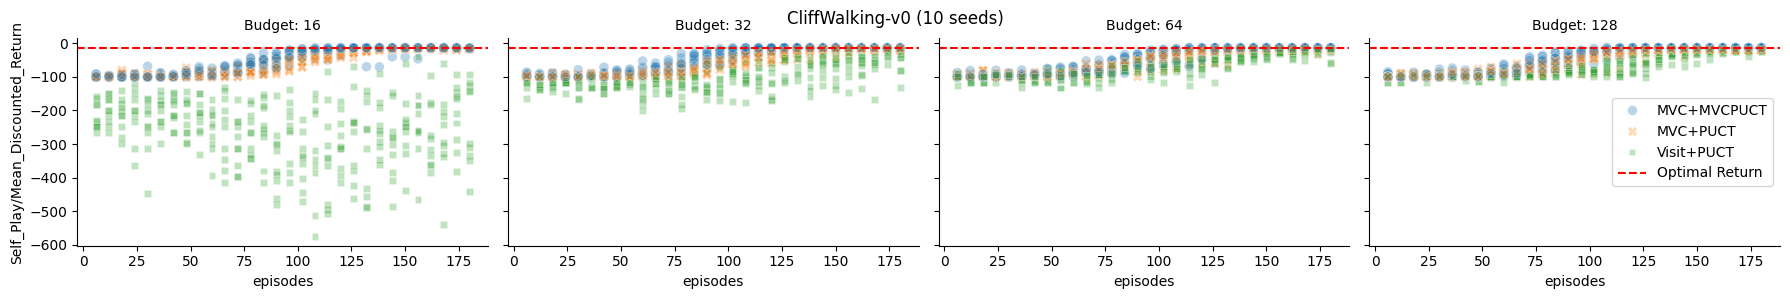

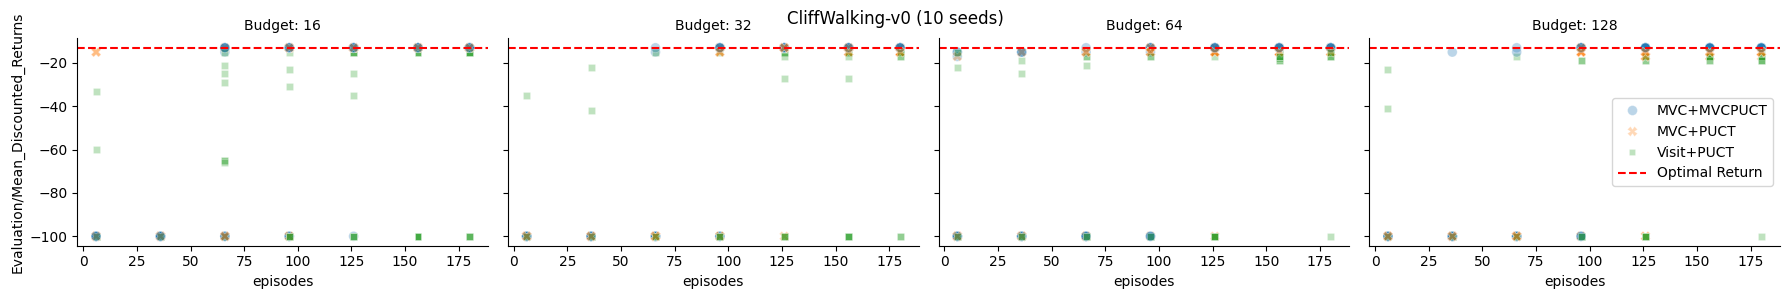

In [12]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

env_description = "CliffWalking-v0"
env_runs = df[df["env_description"] == env_description]
optimum_value = env_runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the scatter plots on each subplot
    g.map_dataframe(sns.scatterplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    s=50, alpha=0.3)  # 's' controls the size of the points; adjust as needed

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics
    g.set_titles("Budget: {col_name}")
    g.fig.suptitle(f"{env_description} ({nseeds} seeds)")
    g.set_axis_labels(x_metric, metric)

    # Add custom legend
    legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
    handles, labels = g.axes.flat[-1].get_legend_handles_labels()
    handles.extend(legend_elements)
    g.axes.flat[-1].legend(handles=handles, loc='center right')

    # Save as pdf
    plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}_dist.pdf")

    plt.show()


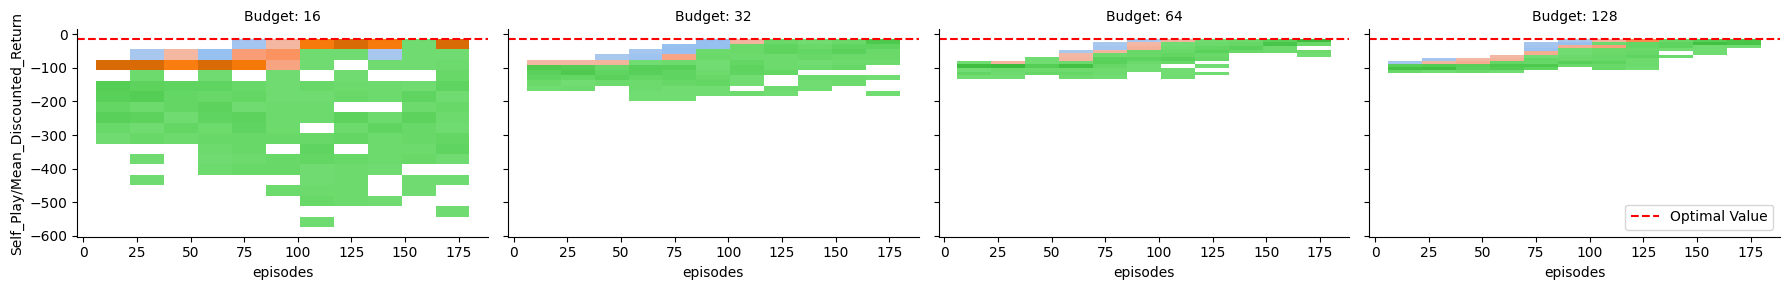

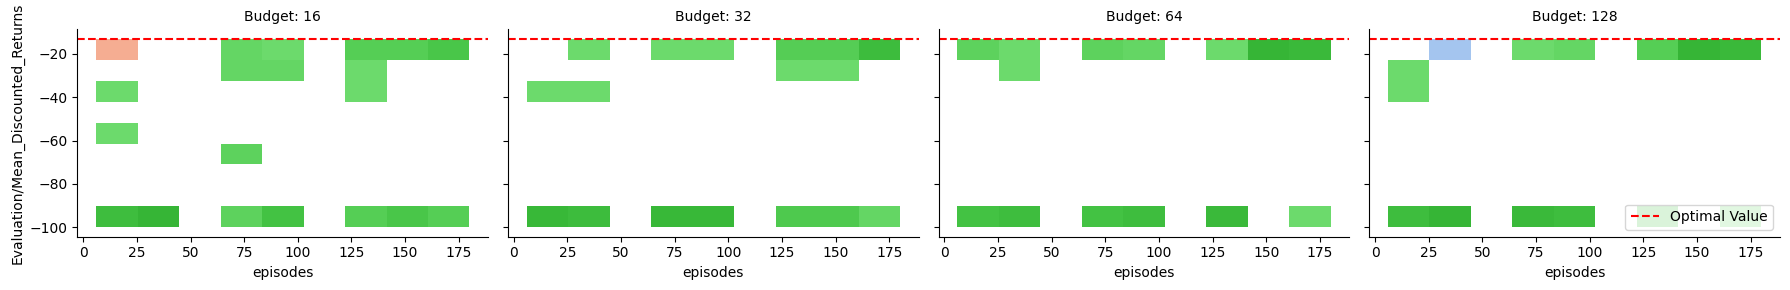

In [13]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

env_description = "CliffWalking-v0"
env_runs = df[df["env_description"] == env_description]
optimum_value = env_runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]


nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the histograms on each subplot
    g.map_dataframe(sns.histplot,
                    x=x_metric, y=metric,
                    hue="policy_combination",
                    element="step", fill=False)  # 'element' can be 'bars', 'step', 'poly'; 'fill' controls whether to fill under the histogram

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics
    g.set_titles("Budget: {col_name}")
    g.set_axis_labels(x_metric, metric)

    # Add custom legend
    legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Value')]
    handles, labels = g.axes.flat[-1].get_legend_handles_labels()
    handles.extend(legend_elements)
    g.axes.flat[-1].legend(handles=handles, loc='lower right')

    # Save as pdf
    plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}.pdf")

    plt.show()


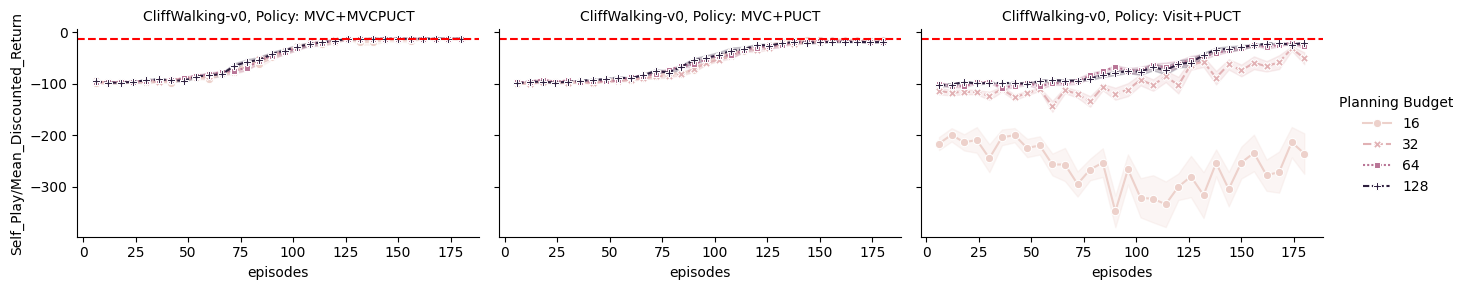

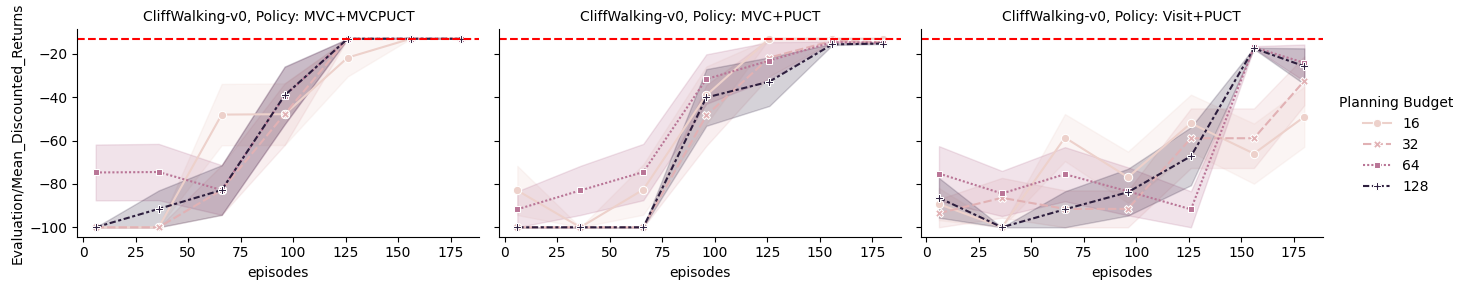

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'metrics' are already defined and loaded properly

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'policy_combination'
    g = sns.FacetGrid(data=df, row="env_description", col="policy_combination", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="planning_budget", style="planning_budget",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend(title="Planning Budget")
    g.set_titles("{row_name}, Policy: {col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()


In [15]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Evaluation/Timesteps',
       'Training/Learning_Rate', 'Self_Play/Min_Timesteps',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Timesteps', '_step',
       'Self_Play/Min_Return', 'Training/Value_Simularities', 

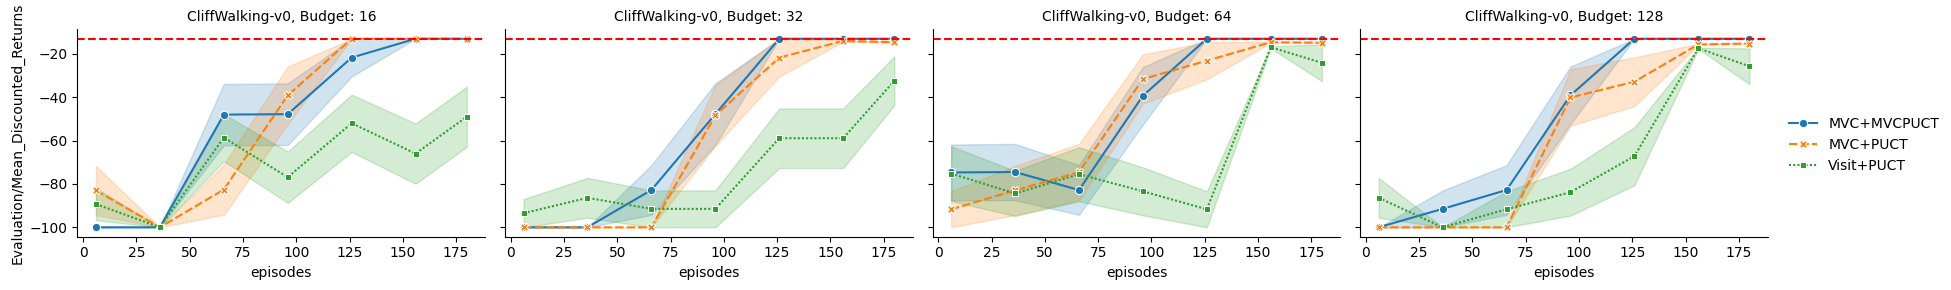

In [16]:
metric = "Evaluation/Mean_Discounted_Returns"
max_episode_length = 100
estimator = "mean"

# Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
# Note: adjust size and aspect to fit your data and preference
g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

# Step 2: Use map_dataframe to draw the lineplots on each subplot
# Pass sns.lineplot as the plotting function and its arguments
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

# add a horizontal line for the optimal value to each subplot

for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")



# Step 3: Adjusting aesthetics (optional)
# Adding a legend
g.add_legend()
g.set_titles("{row_name}, Budget: {col_name}")

# Adjust the labels/titles as needed
g.set_axis_labels(x_metric, metric)


plt.show()

In [17]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Evaluation/Timesteps',
       'Training/Learning_Rate', 'Self_Play/Min_Timesteps',
       'Evaluation/Discounted_Returns', 'Self_Play/Mean_Timesteps', '_step',
       'Self_Play/Min_Return', 'Training/Value_Simularities', 

In [18]:
eval_data = df[df["Evaluation/Trajectories"].notnull()].copy()
eval_data[["episodes", "Evaluation/Trajectories"]]

,episodes,Evaluation/Trajectories
0,6,"[[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ..."
5,36,"[[60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, ..."
10,66,"[[60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, ..."
15,96,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
20,126,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
...,...,...
3580,66,"[[60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, ..."
3585,96,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 44, ..."
3590,126,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
3595,156,"[[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ..."


[]

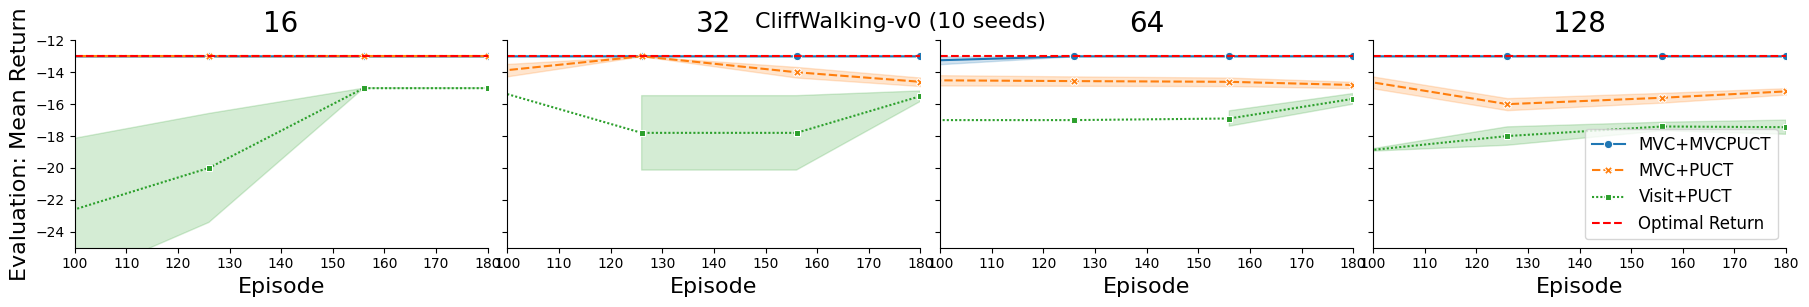

In [39]:
# eval_data only if Evaluation/Trajectories is not None
eval_data['max_length_reached'] = eval_data['Evaluation/Trajectories'].apply(lambda x: len(x[0]) == max_episode_length)

# Filtered DataFrame for plotting without the max_length_reached datapoints
filtered_df = eval_data[~eval_data['max_length_reached']]


# Set up the FacetGrid using the filtered DataFrame
g = sns.FacetGrid(data=filtered_df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

# Adding the optimal value horizontal line
for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")

# Step 3: Adjusting aesthetics
g.set_titles("{col_name}", size=20)
g.fig.suptitle(f"{env_description} ({nseeds} seeds)", fontsize=16)
g.set_axis_labels("Episode", metric_display_names[metric])
# set x axis limit

# increase the font size of the x and y labels
g.set_ylabels(fontsize=16)
g.set_xlabels(fontsize=16)

# Add custom legend
legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
handles, labels = g.axes.flat[-1].get_legend_handles_labels()
handles.extend(legend_elements)
g.axes.flat[-1].legend(handles=handles, loc='lower right', fontsize=12)
g.set(xlim=(100, 180), ylim=(-25, -12))


# Save as pdf
plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}_speed.pdf", bbox_inches='tight')
plt.plot()

In [20]:
filtered_df

,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Training/Regularization_loss,Training/Value_and_Policy_loss,episodes,Self_Play/Mean_Return,Self_Play/Timesteps,Evaluation/Entropies,Evaluation/Mean_Discounted_Returns,Self_Play/Total_Mean_Discounted_Return,policy_combination,max_length_reached
15,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,132.322769,11.350603,96,-30.166666,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13.0,-78.583333,MVC+MVCPUCT,False
20,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,145.618378,45.623430,126,-13.000000,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13.0,-64.253968,MVC+MVCPUCT,False
25,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,150.243652,47.357705,156,-13.000000,"{'packedBins': {'size': 0.015625, 'count': 64,...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13.0,-54.397436,MVC+MVCPUCT,False
29,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,148.038513,17.057392,180,-13.000000,"{'_type': 'histogram', 'values': [0, 0, 0, 0, ...","{'packedBins': {'size': 0.015624999534338713, ...",-13.0,-48.877778,MVC+MVCPUCT,False
45,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,140.535782,10.358209,96,-36.833332,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-15.0,-82.072916,MVC+PUCT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,154.736176,5.546653,180,-13.000000,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13.0,-42.516667,MVC+MVCPUCT,False
3585,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,146.972519,10.575117,96,-48.166668,"{'packedBins': {'min': 32, 'size': 0.5, 'count...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-15.0,-87.187500,MVC+PUCT,False
3590,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,164.787186,48.827082,126,-21.166666,"{'packedBins': {'count': 64, 'min': 15, 'size'...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-13.0,-73.865079,MVC+PUCT,False
3595,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,172.254471,55.436257,156,-15.833333,"{'values': [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'values': [0, 0, 0, 0, ...",-15.0,-62.782051,MVC+PUCT,False


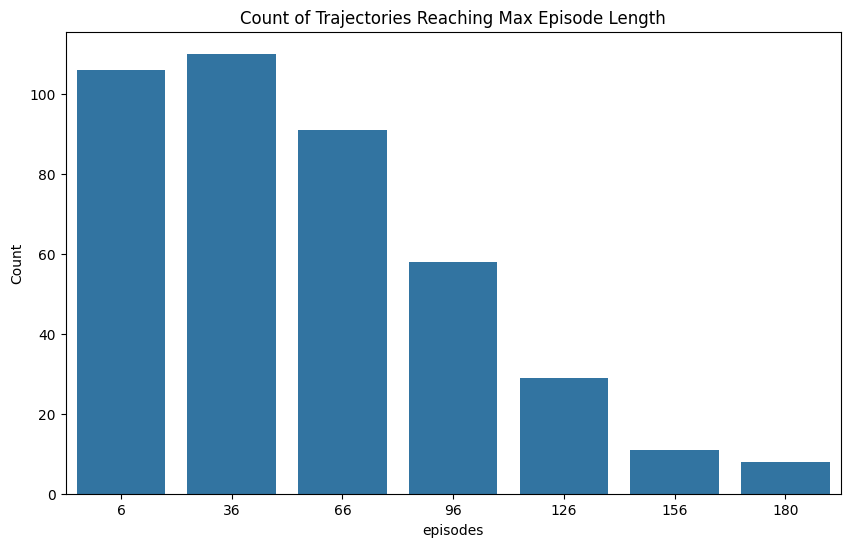

In [21]:
# Aggregate the data to count how many reach the max episode length at each x_metric
aggregated_data = eval_data.groupby(x_metric)['max_length_reached'].sum().reset_index()

# Create a new figure for the additional plot
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x=x_metric, y='max_length_reached')
plt.title('Count of Trajectories Reaching Max Episode Length')
plt.ylabel('Count')
plt.xlabel(x_metric)
plt.show()


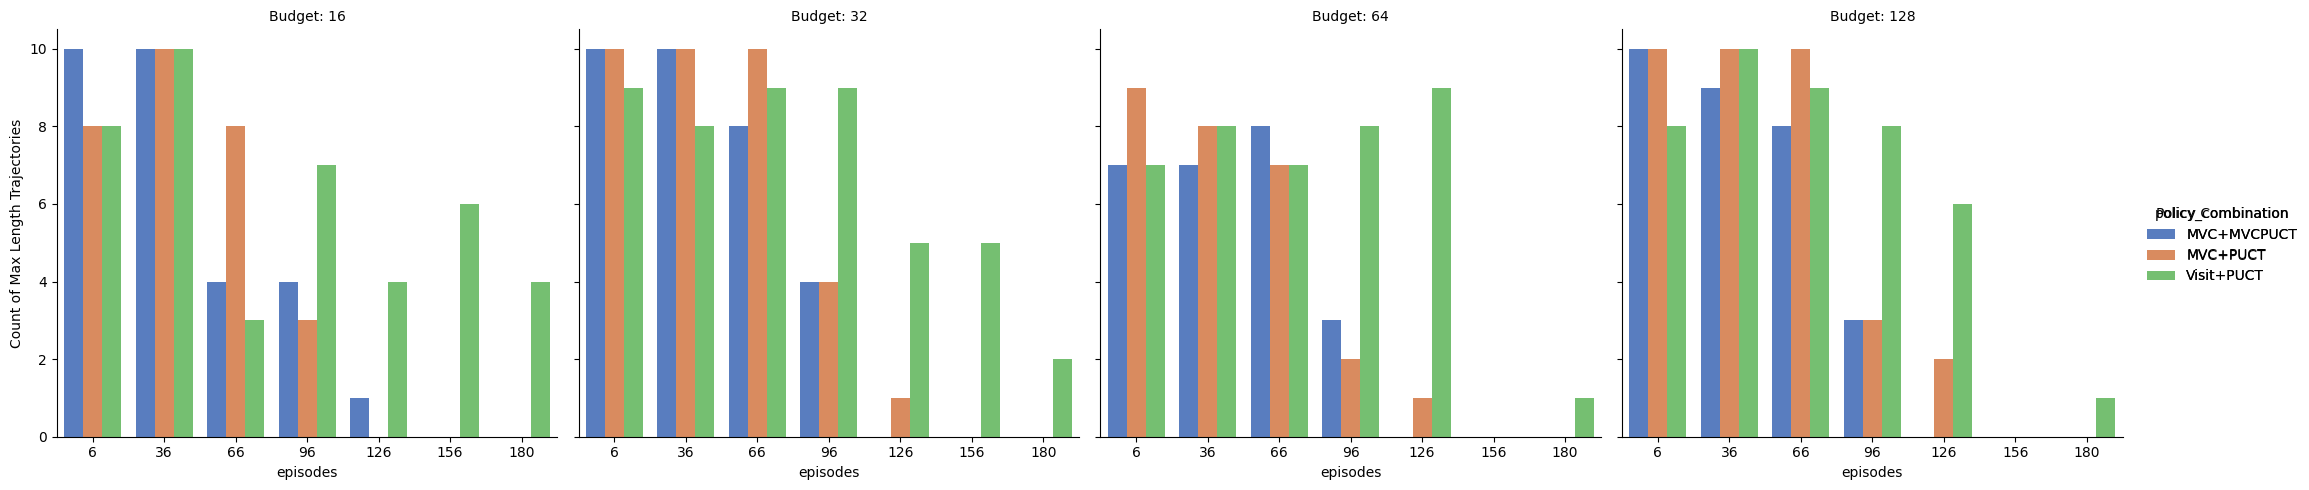

In [22]:
# Adjusting the code to group by x_metric, policy_combination, and planning_budget
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].sum().reset_index()

# Create a faceted bar plot using seaborn's catplot
g = sns.catplot(
    data=aggregated_data,
    kind="bar",
    x=x_metric,
    y='max_length_reached',
    hue='policy_combination',
    col='planning_budget',
    palette='muted',
)

g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")
g.add_legend(title="Policy Combination")
plt.show()


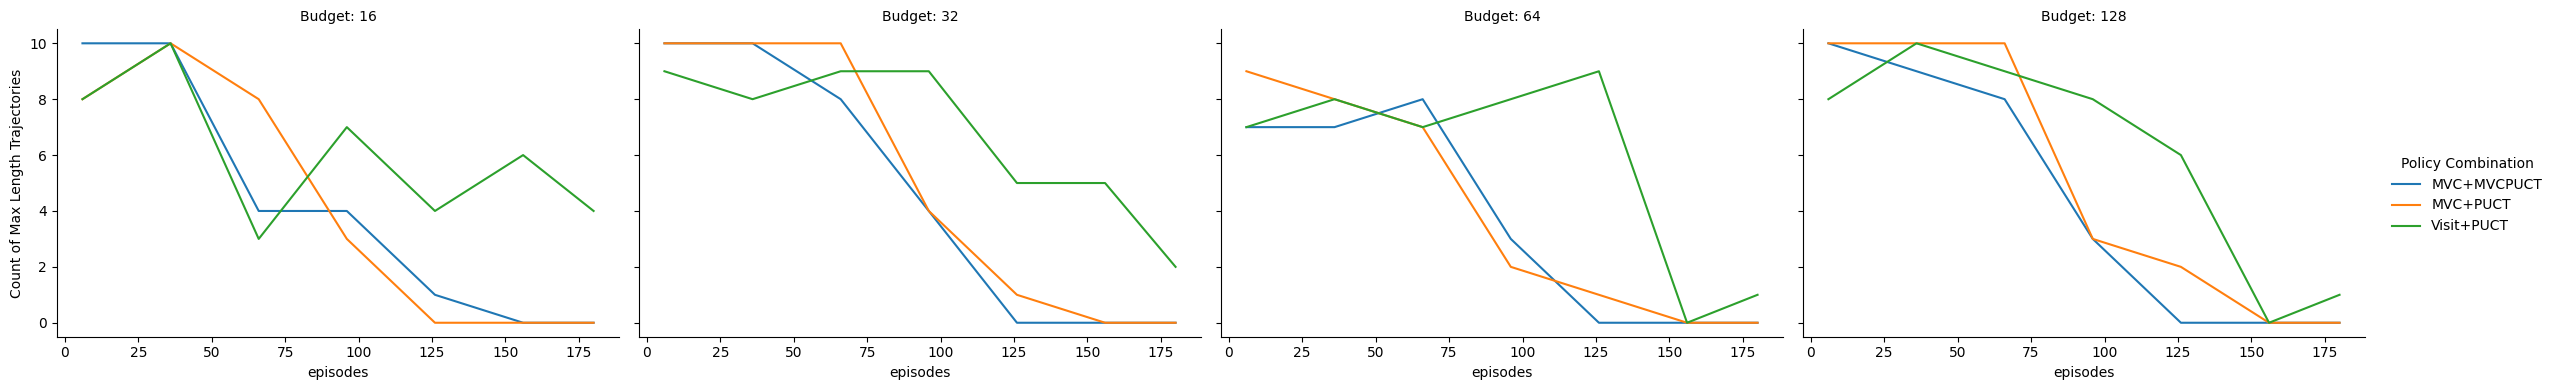

In [23]:
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination", col_wrap=4, height=4, aspect=1.5)

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'max_length_reached')

# Adding customizations
g.add_legend(title="Policy Combination")
g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")

plt.show()


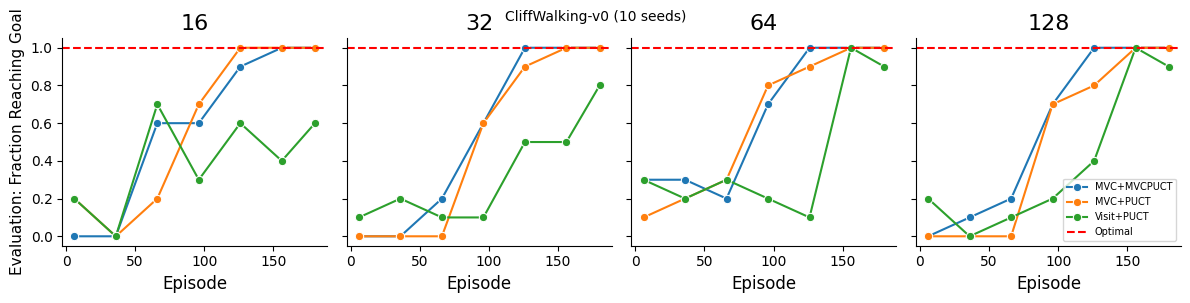

In [51]:
# Assume 'df' is your DataFrame, and you have already added the 'max_length_reached' column
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].apply(lambda x: (x == False).sum() / len(x)).reset_index()
aggregated_data.rename(columns={'max_length_reached': 'count_not_reached'}, inplace=True)

current_order = aggregated_data['policy_combination'].unique()
# swap index 0 and index 1
desired_order = current_order

# Convert the policy_combination column to categorical with the desired order
aggregated_data['policy_combination'] = pd.Categorical(aggregated_data['policy_combination'],
                                                       categories=desired_order,
                                                       ordered=True)
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination")

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'count_not_reached', marker='o')
# Adding the optimal value horizontal line
for ax in g.axes.flat:
    ax.axhline(1.0, ls="--", color="red")
# Step 3: Adjusting aesthetics
g.set_titles("{col_name}", size=16)
g.fig.suptitle(f"{env_description} ({nseeds} seeds)", fontsize=16-6)
g.set_axis_labels("Episode", "Evaluation: Fraction Reaching Goal")
# set x axis limit

# increase the font size of the x and y labels
g.set_ylabels(fontsize=16-5)
g.set_xlabels(fontsize=16-4)

# Add custom legend
legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal')]
handles, labels = g.axes.flat[-1].get_legend_handles_labels()
handles.extend(legend_elements)
g.axes.flat[-1].legend(handles=handles, loc='lower right', fontsize=12-5)


plt.savefig(f"{save_folder}/{env_description}_reachgoal.pdf", bbox_inches='tight')
plt.show()
